<a href="https://colab.research.google.com/github/t-zakharenko/ML-course-May-2025/blob/main/HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn_TZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od


In [2]:
import os
import re
import pandas as pd

In [3]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-3'

In [4]:
# print(os.getcwd())
# Змінити робочу директорію
# os.chdir(r'C:/Users/t_zakharenko/Documents')
# Перевірте поточну директорію
print(os.getcwd())   # Це покаже, куди Python дивиться за замовчуванням (зараз). Перевіримо.

/content


In [5]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tetianazakharenko
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 759MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-3/bank-customer-churn-prediction-dlu-course-c-3.zip to ./bank-customer-churn-prediction-dlu-course-c-3


In [6]:
data_dir = './bank-customer-churn-prediction-dlu-course-c-3'

In [7]:
!ls

bank-customer-churn-prediction-dlu-course-c-3  sample_data


In [8]:
os.listdir(data_dir)

['test.csv', 'sample_submission.csv', 'train.csv']

In [9]:
os.chdir(r'./bank-customer-churn-prediction-dlu-course-c-3')

In [10]:
raw_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [12]:
raw_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.569146e+07,658.944133,37.739600,5.025267,42729.791988,1.590933,0.788800,0.489667,117784.666193,0.203467
std,4330.271354,1.352050e+05,72.255926,8.218363,2.776678,59727.309419,0.532306,0.408174,0.499910,45734.445888,0.402590
min,0.000000,1.581102e+06,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563514e+07,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83058.140000,0.000000
50%,7499.500000,1.569018e+07,662.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123584.870000,0.000000
75%,11249.250000,1.575718e+07,708.000000,42.000000,7.000000,109531.017500,2.000000,1.000000,1.000000,156884.705000,0.000000
max,14999.000000,1.581569e+07,850.000000,74.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_df, val_df = train_test_split(raw_df, test_size=0.25, random_state=42, stratify=raw_df['Exited'])

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [15]:
input_cols = list(train_df.columns)[3:-1]
target_col = 'Exited'

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [16]:
train_inputs = train_df[input_cols]
val_inputs = val_df[input_cols]

train_targets = train_df[target_col]
val_targets = val_df[target_col]

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [17]:
import numpy as np

In [18]:
numeric_cols = train_inputs.select_dtypes('number').columns
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [19]:
numeric_cols, categorical_cols

(Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary'],
       dtype='object'),
 ['Geography', 'Gender'])

In [20]:
train_inputs['Geography'].value_counts()

,count
Geography,
France,6753
Spain,2486
Germany,2011


In [21]:
train_inputs['Gender'].value_counts()

,count
Gender,
Male,6449
Female,4801


In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [24]:
encoder.fit(train_inputs[['Geography']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [25]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [26]:
encoded_cols = list(encoder.get_feature_names_out(['Geography']))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain']


In [27]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[['Geography']])
val_inputs[encoded_cols] = encoder.transform(val_inputs[['Geography']])

/tmp/ipython-input-27-3604344525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[encoded_cols] = encoder.transform(train_inputs[['Geography']])
/tmp/ipython-input-27-3604344525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[encoded_cols] = encoder.transform(train_inputs[['Geography']])
/tmp/ipython-input-27-3604344525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [28]:
train_inputs['Gender'] = (train_inputs['Gender'] == 'Male').astype(int)
val_inputs['Gender'] = (val_inputs['Gender'] == 'Male').astype(int)

/tmp/ipython-input-28-1290798679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs['Gender'] = (train_inputs['Gender'] == 'Male').astype(int)
/tmp/ipython-input-28-1290798679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs['Gender'] = (val_inputs['Gender'] == 'Male').astype(int)


In [29]:
train_inputs = train_inputs.drop('Geography', axis=1)
val_inputs = val_inputs.drop('Geography', axis=1)

In [30]:
numeric_cols = train_inputs.select_dtypes('number').columns
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
print(numeric_cols)
print(categorical_cols)

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')
[]


In [31]:
binary_cols = [col for col in train_inputs.columns if train_inputs[col].nunique() == 2]
binary_cols

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain']

In [32]:
scale_cols = [col for col in numeric_cols if col not in binary_cols]
scale_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_inputs[scale_cols])

MinMaxScaler()

In [34]:
train_inputs[scale_cols] = scaler.transform(train_inputs[scale_cols])
val_inputs[scale_cols] = scaler.transform(val_inputs[scale_cols])

In [35]:
train_inputs.describe().round(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
count,11250.0,11250.0,11250.0,11250.0,11250.0,11250.0,11250.0,11250.0,11250.0,11250.0,11250.0,11250.0
mean,0.5,0.6,0.4,0.5,0.2,0.2,0.8,0.5,0.6,0.6,0.2,0.2
std,0.2,0.5,0.2,0.3,0.3,0.2,0.4,0.5,0.2,0.5,0.4,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.4,0.0,0.3,0.3,0.0,0.0,1.0,0.0,0.4,0.0,0.0,0.0
50%,0.5,1.0,0.4,0.5,0.0,0.3,1.0,0.0,0.6,1.0,0.0,0.0
75%,0.7,1.0,0.4,0.7,0.5,0.3,1.0,1.0,0.8,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з train_inputs, val_inputs використовуючи display().

---
1. Видалила неінформативні ознаки CustomerId, Surname. Ці ознаки не впливають рішення клієнта залишити банк.
2. Категоріальну ознаку 'Gender' закодувала бінарно, 'Male' = 1, 'Female' = 0.
3. Категоріальну ознаку 'Geography' закодувала за допомогою One-Hot Encoding. Створилося три бінарні колонки. Вилучила 'Geography'.
4. Провела масштабування числових ознак (лише тих, що не є бінарними, бо бінарні вже мають відповідний масштаб). Перезаписала відповідні колонки в масштабованому вигляді, щоб модель працювала з коректними значеннями.





In [36]:
from IPython.display import display

display(train_inputs.head().round(1))
display(val_inputs.head().round(1))

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
8263,0.6,1,0.3,0.5,0.6,0.0,1.0,1.0,0.4,1.0,0.0,0.0
14199,0.5,0,0.3,0.4,0.6,0.0,1.0,0.0,0.9,0.0,1.0,0.0
1856,0.6,0,0.1,0.4,0.0,0.3,1.0,1.0,0.8,1.0,0.0,0.0
3013,0.7,1,0.6,0.3,0.0,0.3,1.0,0.0,0.6,1.0,0.0,0.0
8266,0.6,0,0.3,0.7,0.0,0.3,1.0,0.0,0.5,1.0,0.0,0.0


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
1855,0.3,1,0.2,0.9,0.6,0.0,0.0,0.0,0.3,1.0,0.0,0.0
1273,0.4,1,0.4,0.3,0.6,0.0,1.0,0.0,0.9,0.0,1.0,0.0
5414,0.5,1,0.2,0.7,0.0,0.0,1.0,1.0,0.8,1.0,0.0,0.0
10923,0.4,1,0.7,0.3,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0
5835,0.8,0,0.4,0.5,0.0,0.0,1.0,1.0,0.9,0.0,0.0,1.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [37]:
!pip install pyarrow --quiet

In [38]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
train_targets.to_frame().to_parquet('train_targets.parquet')
val_targets.to_frame().to_parquet('val_targets.parquet')

In [39]:
current_dir = print(os.getcwd())


/content/bank-customer-churn-prediction-dlu-course-c-3


In [40]:
!ls

sample_submission.csv  train_inputs.parquet   val_targets.parquet
test.csv	       train_targets.parquet
train.csv	       val_inputs.parquet


In [41]:
os.listdir(current_dir)

['train_inputs.parquet',
 'train_targets.parquet',
 'val_inputs.parquet',
 'test.csv',
 'sample_submission.csv',
 'train.csv',
 'val_targets.parquet']

In [42]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (11250, 12)
train_targets: (11250,)
val_inputs: (3750, 12)
val_targets: (3750,)


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [43]:
X_train = train_inputs[scale_cols + binary_cols].copy()
X_val = val_inputs[scale_cols + binary_cols].copy()
y_train = train_targets
y_val = val_targets

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

model.fit(train_inputs[scale_cols + binary_cols], train_targets)

LogisticRegression(solver='liblinear')

In [45]:
train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]

In [53]:
train_preds = (train_probs >= 0.5).astype(int)
val_preds = (val_probs >= 0.5).astype(int)

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

# Confusion Matrix
---

In [54]:
from sklearn.metrics import confusion_matrix

print("\nTRAIN Confusion Matrix:")
print(confusion_matrix(y_train, train_preds))
print(confusion_matrix(y_train, train_preds, normalize='true').round(2))

print("\nValidation Confusion Matrix:")
print(confusion_matrix(y_val, val_preds))
print(confusion_matrix(y_val, val_preds, normalize='true').round(2))




TRAIN Confusion Matrix:
[[8601  360]
 [1048 1241]]
[[0.96 0.04]
 [0.46 0.54]]

Validation Confusion Matrix:
[[2847  140]
 [ 344  419]]
[[0.95 0.05]
 [0.45 0.55]]


# ROC Curve та AUROC
---

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def compute_auroc_and_build_roc(X, y, name=''):
    # Predict probabilities
    y_pred_proba = model.predict_proba(X)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

    # Compute AUROC
    roc_auc = roc_auc_score(y, y_pred_proba)
    print(f'AUROC for {name}: {roc_auc:.2f}')

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

AUROC for Train: 0.88


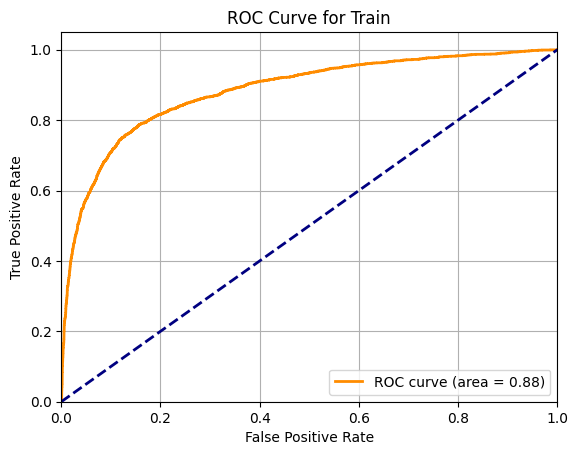

AUROC for Validation: 0.88


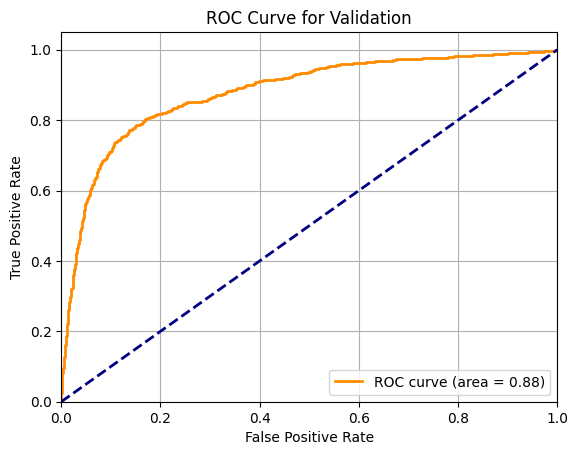

In [56]:
compute_auroc_and_build_roc(X_train, y_train, name='Train')
compute_auroc_and_build_roc(X_val, y_val, name='Validation')

# F1 Score
---

In [57]:
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, train_preds)
val_f1 = f1_score(y_val, val_preds)



In [58]:
print(f"Train F1 Score: {train_f1:.2f}")
print(f"Validation F1 Score: {val_f1:.2f}")

Train F1 Score: 0.64
Validation F1 Score: 0.63


# Accuracy
---

In [59]:
# Обраховуємо точність для цієї моделі

from sklearn.metrics import accuracy_score

train_model_acc = accuracy_score(y_train, train_preds)
val_model_acc = accuracy_score(y_val, val_preds)

print(f"Train Accuracy (logistic regression): {train_model_acc:.2f}")
print(f"Validation Accuracy (logistic regression): {val_model_acc:.2f}")

Train Accuracy (logistic regression): 0.87
Validation Accuracy (logistic regression): 0.87


# Висновок

Модель логістичної регресії дає задовільну якість передбачення:
- AUROC = 0.88 на тренувальному та валідаційному наборах.
- F1 Score склав 0.64 і 0.63 відповідно.
---

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [60]:
# Перевіряємо мажоритарний клас
print(y_train.value_counts())

Exited
0.0    8961
1.0    2289
Name: count, dtype: int64


Мажоритарний клас - Exited = 0, тобто клієнт залишається в банку

In [61]:
# Створюємо передбачення на основі мажоритарного класу
majority_class = y_train.mode()[0]

train_majority_preds = [majority_class] * len(y_train)
val_majority_preds = [majority_class] * len(y_val)

In [62]:
# Обраховуємо точність для цієї моделі
train_majority_acc = accuracy_score(y_train, train_majority_preds)
val_majority_acc = accuracy_score(y_val, val_majority_preds)

print(f"Train Accuracy (majority model): {train_majority_acc:.2f}")
print(f"Validation Accuracy (majority model): {val_majority_acc:.2f}")

Train Accuracy (majority model): 0.80
Validation Accuracy (majority model): 0.80


Модель на основі логістичної регресії дає точність 87%, на 7% вище, ніж мажоритарна" модель. Мені здається ця різниця не дає підстав говорити, що модель дає гарні результати. Скоріше, посередні або задовільні.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [63]:
import joblib

In [64]:
bank_customer_churn_prediction_bundle = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [65]:
joblib.dump(bank_customer_churn_prediction_bundle, 'bank_customer_churn_prediction.joblib')

['bank_customer_churn_prediction.joblib']

In [66]:
model_2_bundle = joblib.load('bank_customer_churn_prediction.joblib')

In [67]:
# перевірка
model_2 = model_2_bundle['model']
val_preds_2 = model_2.predict(X_val)
val_preds_2

array([0., 1., 0., ..., 0., 0., 0.])

In [68]:
accuracy_score(y_val, val_preds_2)

0.8709333333333333

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [69]:
import warnings
warnings.filterwarnings("ignore")

# def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
#    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
#    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
#    X_input = input_df[numeric_cols + encoded_cols]
#    prob = model.predict_proba(X_input)[:,1]
#    return prob

In [70]:
# Виправлена функція
def predict_raw_df(scaler, encoder, input_df, scale_cols, encoded_cols):
    input_df = input_df.copy()

    input_df['Gender'] = (input_df['Gender'] == 'Male').astype(int)

    geo_encoded = encoder.transform(input_df[['Geography']])
    geo_encoded_df = pd.DataFrame(geo_encoded, columns=encoded_cols, index=input_df.index)
    input_df = pd.concat([input_df, geo_encoded_df], axis=1)

    drop_cols = ['id', 'CustomerId', 'Surname', 'Geography']
    input_df = input_df.drop(columns=drop_cols, errors='ignore')

    input_df[scale_cols] = scaler.transform(input_df[scale_cols])

    X_input = input_df[model.feature_names_in_].astype(float)
    return model.predict_proba(X_input)[:, 1]

In [71]:
predict_raw_df(scaler, encoder, raw_df[:5], scale_cols, encoded_cols)

array([0.00641699, 0.03714702, 0.36933828, 0.37617547, 0.9758494 ])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [72]:
test_raw_df = pd.read_csv('test.csv')

In [73]:
test_probs = predict_raw_df(scaler, encoder, test_raw_df, scale_cols, encoded_cols)
test_raw_df['Exited'] = (test_probs >= 0.5).astype(int)

In [77]:
test_raw_df['Exited'].value_counts()

,count
Exited,
0,8453
1,1547


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [81]:
submission_df = pd.read_csv('sample_submission.csv')

submission_df['Exited'] = test_raw_df['Exited'].values
submission_df['Exited'].value_counts()

,count
Exited,
0,8453
1,1547


In [82]:
submission_df.to_csv('submission_log_reg.csv', index=False)
submission_df.head()

,id,Exited
0,15000,0
1,15001,0
2,15002,0
3,15003,0
4,15004,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>